<h1><center>Assessmet 5 on Advanced Data Analysis using Pandas</center></h1>

## **Project 2:  Correlation Between the GDP Rate and Unemployment Rate (2019)**

In [87]:
import warnings
warnings.simplefilter('ignore', FutureWarning)

import pandas as pd

In [88]:
pip install pandas_datareader

Note: you may need to restart the kernel to use updated packages.


# Getting the Datasets

We got the two datasets we will be considering in this project from the Worldbank website. The first one dataset, available at http://data.worldbank.org/indicator/NY.GDP.MKTP.CD, lists the GDP of the world's countries in current US dollars, for various years. The use of a common currency allows us to compare GDP values across countries. The other dataset, available at https://data.worldbank.org/indicator/SL.UEM.TOTL.NE.ZS, lists the unemployment rate of the world's countries. The datasets were downloaded as Excel files in June 2021.

In [89]:
GDP_INDICATOR = 'NY.GDP.MKTP.CD'
#below is the first five rows of the first dataset, GDP Indicator.
gdpReset= pd.read_excel("API_NY.GDP.MKTP.CD.xls")
gdpReset.head()

,Country Name,year,NY.GDP.MKTP.CD
0,Aruba,2019,NaN
1,Afghanistan,2019,1.929110e+10
2,Angola,2019,8.881570e+10
3,Albania,2019,1.527918e+10
4,Andorra,2019,3.154058e+09


In [90]:
#below is the last five rows of the first dataset, GDP Indicator.
gdpReset.tail()

,Country Name,year,NY.GDP.MKTP.CD
259,Kosovo,2019,7.926134e+09
260,"Yemen, Rep.",2019,2.258108e+10
261,South Africa,2019,3.514316e+11
262,Zambia,2019,2.330977e+10
263,Zimbabwe,2019,2.144076e+10


In [91]:
UNEMPLOYMENT_INDICATORS = 'SL.UEM.TOTL.NE.ZS'
#below is the first five rows of the second dataset, Uemployment Rate Indicator.
UnemployReset= pd.read_excel('API_SL.UEM.TOTL.NE.ZS.xls')
UnemployReset.head()

,Country Name,year,SL.UEM.TOTL.NE.ZS
0,Aruba,2019,NaN
1,Afghanistan,2019,NaN
2,Angola,2019,NaN
3,Albania,2019,11.47
4,Andorra,2019,NaN


In [92]:
#below is the last five rows of the second dataset, Unemployment Rate Indicator.
UnemployReset.tail()

,Country Name,year,SL.UEM.TOTL.NE.ZS
259,Kosovo,2019,25.559999
260,"Yemen, Rep.",2019,NaN
261,South Africa,2019,28.469999
262,Zambia,2019,NaN
263,Zimbabwe,2019,16.860001


# Cleaning the data

Inspecting the data with head() and tail() methods shows that for some countries the GDP and unemploymet rate values are missing. The data is, therefore, cleaned by removing the rows with unavailable values using the drop() method.

In [93]:
gdpCountries = gdpReset[0:].dropna()
gdpCountries

,Country Name,year,NY.GDP.MKTP.CD
1,Afghanistan,2019,1.929110e+10
2,Angola,2019,8.881570e+10
3,Albania,2019,1.527918e+10
4,Andorra,2019,3.154058e+09
5,Arab World,2019,2.817415e+12
...,...,...,...
259,Kosovo,2019,7.926134e+09
260,"Yemen, Rep.",2019,2.258108e+10
261,South Africa,2019,3.514316e+11
262,Zambia,2019,2.330977e+10


In [94]:
UnemployCountries = UnemployReset[0:].dropna()
UnemployCountries

,Country Name,year,SL.UEM.TOTL.NE.ZS
3,Albania,2019,11.470000
6,United Arab Emirates,2019,2.230000
7,Argentina,2019,9.840000
8,Armenia,2019,18.299999
11,Australia,2019,5.160000
...,...,...,...
255,Vietnam,2019,2.040000
257,World,2019,5.685293
259,Kosovo,2019,25.559999
261,South Africa,2019,28.469999


# Transforming the data

The World Bank reports GDP in US dollars and cents. To make the data easier to read, the GDP is converted to millions of British pounds with the following auxiliary functions, using the average 2020 dollar-to-pound conversion rate provided by http://www.ukforex.co.uk/forex-tools/historical-rate-tools/yearly-average-rates..

In [95]:
def roundToMillions (value):
    return round(value / 1000000)

def usdToGBP (usd):
    return usd / 1.284145

GDP = 'GDP (£m)'
gdpCountries[GDP] = gdpCountries[GDP_INDICATOR].apply(usdToGBP).apply(roundToMillions)
gdpCountries.head()

,Country Name,year,NY.GDP.MKTP.CD,GDP (£m)
1,Afghanistan,2019,1.929110e+10,15023
2,Angola,2019,8.881570e+10,69163
3,Albania,2019,1.527918e+10,11898
4,Andorra,2019,3.154058e+09,2456
5,Arab World,2019,2.817415e+12,2194000


The unnecessary columns can be dropped.

In [96]:
COUNTRY = 'Country Name'
headings = [COUNTRY, GDP]
gdpClean = gdpCountries[headings]
gdpClean.head()

,Country Name,GDP (£m)
1,Afghanistan,15023
2,Angola,69163
3,Albania,11898
4,Andorra,2456
5,Arab World,2194000


In [97]:
UNEMPLOYMENT = 'Unemploymet Rate'
UnemployCountries[UNEMPLOYMENT] = UnemployCountries[UNEMPLOYMENT_INDICATORS].apply(round)
headings = [COUNTRY, UNEMPLOYMENT]
UnempClean = UnemployCountries[headings]
UnempClean.head()

,Country Name,Unemploymet Rate
3,Albania,11
6,United Arab Emirates,2
7,Argentina,10
8,Armenia,18
11,Australia,5


# Combining the data

The tables are combined through an inner join merge method on the common 'Country Name' column.

In [98]:
gdpVsUnemp = pd.merge(gdpClean, UnempClean, on=COUNTRY, how='inner')
gdpVsUnemp.head()

,Country Name,GDP (£m),Unemploymet Rate
0,Albania,11898,11
1,United Arab Emirates,327955,2
2,Argentina,346881,10
3,Armenia,10647,18
4,Australia,1087546,5


# Calculating the correlation

To measure if the unemployment rate and the GDP grow together or not, the Spearman rank correlation coefficient is used.

In [99]:
from scipy.stats import spearmanr

gdpColumn = gdpVsUnemp[GDP]
UnemployColumn = gdpVsUnemp[UNEMPLOYMENT]
(correlation, pValue) = spearmanr(gdpColumn, UnemployColumn)
print('The correlation is', correlation)
if pValue < 0.05:
    print('It is statistically significant.')
else:
    print('It is not statistically significant.')

The correlation is -0.26780713759634595
It is statistically significant.


The value shows an indirect correlation, i.e. richer countries tend to have lower unemployment rate. A rise by one percentage point of unemployment will reduce real GDP growth by 0.26 percentage points with a delay of 7 lags. Studies have shown that the higher the GDP growth rate of a country, the higher the employment rate. Thus, resulting to a lower unemployment rate. Besides, a negative or inverse correlation, between two variables, indicates that one variable increases while the other decreases, and vice-versa.

# Visualizing the Data

Measures of correlation can be misleading, so it is best to view the overall picture with a scatterplot. The GDP axis uses a logarithmic scale to better display the vast range of GDP values, from a few million to several billion (million of million) pounds.

<AxesSubplot:xlabel='GDP (£m)', ylabel='Unemploymet Rate'>

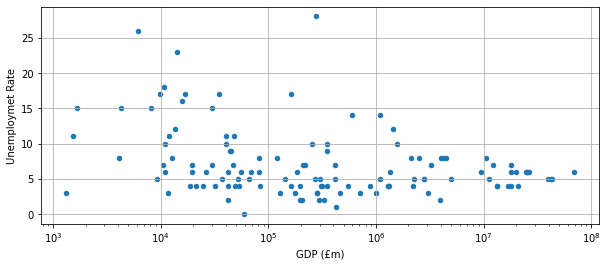

In [104]:
%matplotlib inline
gdpVsUnemp.plot(x=GDP, y=UNEMPLOYMENT, kind='scatter', grid=True, logx=True, figsize=(10, 4))

The plot shows there is no clear correlation: there are some poor countries with a low unemployment rate and very few averagely rich countries with a high employment rate. Hpwever, most extremely rich countries have a low unemployment rate. Besides, countries with around 10 thousand (10^4) to (10^6) million pounds GDP have almost the full range of values, from below 5 to over 10 percentage but there are still some countries with more than 10 thousand (10^5) million pounds GDP with a high unemployment rate.

Comparing the 10 poorest countries and the 10 countries with the lowest unemployment rate shows that total GDP is a rather crude measure. The population size should be taken into consideration for a more precise definiton of what 'poor' and 'rich' means.

In [101]:
# the 10 countries with lowest GDP
gdpVsUnemp.sort_values(GDP).head(10)

,Country Name,GDP (£m),Unemploymet Rate
107,Seychelles,1326,3
22,Cabo Verde,1543,11
64,St. Lucia,1653,15
13,Barbados,4056,8
80,Montenegro,4316,15
122,Kosovo,6172,26
100,Rwanda,8063,15
74,Moldova,9320,5
77,North Macedonia,9771,17
14,Brunei Darussalam,10489,7


In [102]:
# the 10 countries with the lowest unemployment rate
gdpVsUnemp.sort_values(UNEMPLOYMENT).head(10)

,Country Name,GDP (£m),Unemploymet Rate
79,Myanmar,59250,0
110,Thailand,423277,1
92,Philippines,293421,2
120,Vietnam,203965,2
73,"Macao SAR, China",41942,2
59,Japan,3957318,2
1,United Arab Emirates,327955,2
25,Czech Republic,195212,2
78,Malta,11673,3
107,Seychelles,1326,3


# Conclusion

The correlation between real GDP growth and unemployment is very important for policy makers in order to obtain a sustainable rise in living standards. If GDP growth rate is below its natural rate it is indicated to promote employment because this rise in total income will note generate inflationary pressures. In contrast, if the GDP growth is above its natural level, policy makers will decide not to intensively promote the creation of new jobs in order to obtain a sustainable growth rate which will not generate inflation. The correlation coefficient shows that the variables are negatively correlated as predicted by the theory. These values are particularly important for policy makers in order to obtain an optimal relation between unemployment and real GDP growth. 